# importing required libraries and loading dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

In [8]:
# loading the dataset
dataset=pd.read_csv("sample_dataset (1).csv")
dataset.head()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,1,5,629,2022,702,1,0,3,627,457528
1,2,2,2402,1972,251,1,1,3,705,78691
2,3,7,1547,1968,1224,3,0,1,282,316056
3,4,1,666,1937,2890,4,1,3,39,213285
4,5,9,2946,1985,768,2,1,4,848,304717


# Data preprocessing and EDA

In [9]:
# Dropping the index coloumn as it doesnot have any importance with target variable, 
# also studying the data to see datatypes and check if there are any nan values
dataset.drop(columns=["ID"],axis=1,inplace=True)
print(dataset.info())
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1000 non-null   int64
 1   GrLivArea    1000 non-null   int64
 2   YearBuilt    1000 non-null   int64
 3   TotalBsmtSF  1000 non-null   int64
 4   FullBath     1000 non-null   int64
 5   HalfBath     1000 non-null   int64
 6   GarageCars   1000 non-null   int64
 7   GarageArea   1000 non-null   int64
 8   SalePrice    1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB
None
OverallQual    0
GrLivArea      0
YearBuilt      0
TotalBsmtSF    0
FullBath       0
HalfBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64


In [12]:
# Using describe method we can find the mean and other basic statistics to find how they are scaled
dataset.describe()

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.61700,1996.309000,1960.760000,1740.401000,2.506000,0.994000,2.038000,484.786000,270963.885000
std,2.92076,883.054538,35.169351,1007.061464,1.135453,0.809085,1.406604,282.732658,129264.336981
min,1.00000,500.000000,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,50363.000000
25%,3.00000,1223.750000,1931.000000,838.750000,1.000000,0.000000,1.000000,239.000000,157806.750000
50%,6.00000,1966.000000,1963.000000,1733.000000,3.000000,1.000000,2.000000,500.000000,268642.500000
75%,8.00000,2800.000000,1991.000000,2599.500000,4.000000,2.000000,3.000000,705.500000,385333.250000
max,10.00000,3499.000000,2022.000000,3499.000000,4.000000,2.000000,4.000000,1000.000000,499208.000000


From the above observations we find that there were no missing values and categorical features to handle. Also the numerical coloumns are following different scales

In [13]:
# Correlation between all the features including dependent variable
dataset.corr()

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.054348,-0.047398,-0.027117,-0.026321,0.009616,0.001110,-0.019213,-0.023987
GrLivArea,0.054348,1.000000,-0.001860,-0.043779,0.060206,0.045500,0.030373,0.046051,-0.022882
YearBuilt,-0.047398,-0.001860,1.000000,0.051829,0.000738,0.050184,-0.001940,0.025297,-0.004240
TotalBsmtSF,-0.027117,-0.043779,0.051829,1.000000,0.017190,0.037160,0.006063,0.025627,0.031701
FullBath,-0.026321,0.060206,0.000738,0.017190,1.000000,0.030548,0.016779,-0.021539,0.009416
HalfBath,0.009616,0.045500,0.050184,0.037160,0.030548,1.000000,0.031865,0.039001,-0.009761
GarageCars,0.001110,0.030373,-0.001940,0.006063,0.016779,0.031865,1.000000,0.026021,0.024781
GarageArea,-0.019213,0.046051,0.025297,0.025627,-0.021539,0.039001,0.026021,1.000000,-0.051827
SalePrice,-0.023987,-0.022882,-0.004240,0.031701,0.009416,-0.009761,0.024781,-0.051827,1.000000


From the above correlation matrix it is observed that there is no correlation among the variables and no variable is showing any relation with SalePrice variable. So using linear regression models wont be an ideal solution. It would be better to go with Random Forest or Support Vector Regressors

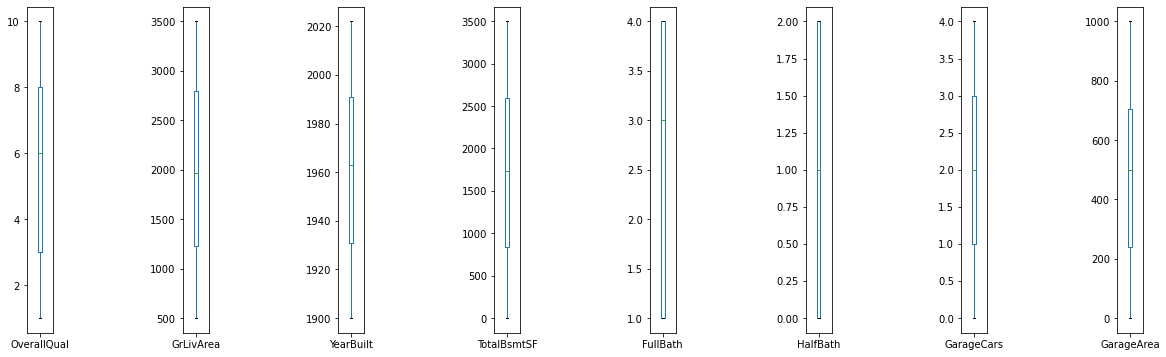

In [14]:
'''Seperating the independent features and dependent feature and plotting box plots 
   for each independent feature to check for any outliers'''
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=5) 
plt.show()

From the boxplots we can see there were no outliers

In [15]:
# Standardize the data to bring all features to have same scale
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [16]:
# Splitting the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# This will be a utility function which helps in calculating the metrics
def metrics(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2score=r2_score(y_test,y_pred)
    adjr2 = 1 - (1-r2score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("Mean Squared Error (MSE): ", mse)
    print("Root Mean Squared Error (RMSE): ", rmse)
    print("R-squared (R2) Score: ", r2score)
    print("Adjusted R-squared (R2) Score: ", adjr2)

# Training and validating individual models

In [21]:
# Running linear regression just to check its metrics but it is not an ideal model
regression=LinearRegression()
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
metrics(y_test,y_pred)


Mean Squared Error (MSE):  17434097212.63355
Root Mean Squared Error (RMSE):  132038.24147811704
R-squared (R2) Score:  -0.03207867039927126
Adjusted R-squared (R2) Score:  -0.06633854327559563


In [22]:
# Random Forest regressor
regression=RandomForestRegressor(n_estimators=10,max_depth=25, random_state=42)
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
metrics(y_test,y_pred)


Mean Squared Error (MSE):  20372696565.99772
Root Mean Squared Error (RMSE):  142732.9554307544
R-squared (R2) Score:  -0.20604040047718408
Adjusted R-squared (R2) Score:  -0.24607493659260937


In [23]:
# Support Vector regressor
regression=SVR(kernel='rbf', C=1.0, epsilon=0.2)
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
metrics(y_test,y_pred)

Mean Squared Error (MSE):  17231815037.566673
Root Mean Squared Error (RMSE):  131270.00814187023
R-squared (R2) Score:  -0.02010379634974435
Adjusted R-squared (R2) Score:  -0.05396616303355328


Here i had considered three algorithms(Linear regression, Random forest regressor, Support vector machines). Here three algorithms returned poor R square scores stating they haven't learn the patterns in the dataset. 

Hyper parameter tuning of Random forest regressor and SVM


In [24]:
# Hyper parameter tuning of Random forest regressor
rf_regressor=RandomForestRegressor()
param_grid = {'n_estimators': [5,10,30,50,70], 'max_features': [5,7,8], 'max_depth': [5, 10, 20, 30]}
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X, y)
grid_search.best_estimator_

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=50)

In [25]:
# Creating RF regressor with best parameters
regression=RandomForestRegressor(max_depth=5, max_features=5, n_estimators=50)
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
metrics(y_test,y_pred)



Mean Squared Error (MSE):  17643544621.033707
Root Mean Squared Error (RMSE):  132829.00519477553
R-squared (R2) Score:  -0.044477718089768414
Adjusted R-squared (R2) Score:  -0.0791491776114206


In [26]:
# Hyper parameter tuning of SVM regressor
svm_regressor=SVR()
param_grid = {'C': [0.1, 1, 10],'epsilon': [0.1, 0.2, 0.5],'kernel': ['rbf', 'poly']
}
grid_search = GridSearchCV(svm_regressor, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X, y)
grid_search.best_estimator_

SVR(C=10)

In [27]:
regression=SVR(C=10)
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
metrics(y_test,y_pred)

Mean Squared Error (MSE):  17233476504.442333
Root Mean Squared Error (RMSE):  131276.33642222933
R-squared (R2) Score:  -0.020202153293785052
Adjusted R-squared (R2) Score:  -0.05406778493839193


# Conclusion

Here after performing Hyperparameter tuning there is no improvement in scores. Seems to be the data is not relevant for Predicting the target variable Also no feature is having any correlation with target variable. We can add relevant data for increasing the accuracy.